In [10]:
csv_path = "/home/tlips/Code/few-shot-keypoints/results/KIL/metrics.csv"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(csv_path)




In [11]:
df

,featurizer,processing,seed,category,results_path,avg_distance_all,avg_distance_visible,median_distance_all,median_distance_visible,image_PCK,image_PCK_visible,point_PCK,point_PCK_visible,mAP_l2_distance,mAP_bbox_alpha
0,radiov2-h,none,2025,shoe-v3-initial-frames,results/KIL/radiov2-h/shoe-v3-initial-frames/n...,9.190109,9.190109,8.506304,8.506304,0.933333,0.933333,0.933333,0.933333,0.744308,0.952675
1,radiov2-h,none,2026,shoe-v3-initial-frames,results/KIL/radiov2-h/shoe-v3-initial-frames/n...,18.343744,18.343744,14.911848,14.911848,0.573333,0.573333,0.573333,0.573333,0.810432,0.763104
2,radiov2-h,none,2028,shoe-v3-initial-frames,results/KIL/radiov2-h/shoe-v3-initial-frames/n...,10.586645,10.586645,8.710827,8.710827,0.880000,0.880000,0.880000,0.880000,0.752466,0.969222
3,radiov2-h,none,2027,shoe-v3-initial-frames,results/KIL/radiov2-h/shoe-v3-initial-frames/n...,18.343744,18.343744,14.911848,14.911848,0.573333,0.573333,0.573333,0.573333,0.810432,0.763104
4,radiov2-h,none,2025,mug-v3-initial-frames,results/KIL/radiov2-h/mug-v3-initial-frames/no...,12.077296,12.077296,7.376777,7.376777,0.520000,0.520000,0.520000,0.520000,0.856313,0.841028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,dift-sd2.1b-e8-r512,none,2027,mug-v2-initial-frames,results/KIL/dift-sd2.1b-e8-r512/mug-v2-initial...,10.822055,10.822055,9.574179,9.574179,0.360544,0.360544,0.360544,0.360544,0.642396,0.593427
428,dift-sd2.1b-e8-r512,none,2025,shoe-v2-initial-frames,results/KIL/dift-sd2.1b-e8-r512/shoe-v2-initia...,16.183905,16.183905,12.286110,12.286110,0.855319,0.855319,0.855319,0.855319,0.823459,0.946728
429,dift-sd2.1b-e8-r512,none,2026,shoe-v2-initial-frames,results/KIL/dift-sd2.1b-e8-r512/shoe-v2-initia...,13.804057,13.804057,7.045240,7.045240,0.923404,0.923404,0.923404,0.923404,0.871582,0.993900
430,dift-sd2.1b-e8-r512,none,2028,shoe-v2-initial-frames,results/KIL/dift-sd2.1b-e8-r512/shoe-v2-initia...,12.832383,12.832383,7.269223,7.269223,0.906383,0.906383,0.906383,0.906383,0.882491,0.996339


In [12]:
# compare all featurizers, for each categories, across all seeds

# Group by featurizer and category, then compute mean and std for all metric columns

# Identify metric columns (exclude featurizer, processing, seed, category, etc.)
non_metric_columns = ['featurizer', 'processing', 'seed', 'category', 'results_path']
metric_columns = [col for col in df.columns if col not in non_metric_columns]

# Group and aggregate
grouped = df.groupby(['featurizer', 'category'])

# get mean and std for each metric column
grouped = grouped[metric_columns].agg(['mean', 'std', 'median', 'min', 'max'])

# flatten the column MultiIndex
grouped.columns = [f"{metric}_{stat}" for metric, stat in grouped.columns]
grouped



avg_distance_all_mean  \
featurizer         category                                        
dift-sd2.1-e1      mug-v2-initial-frames               21.864035   
                   mug-v3-initial-frames               29.975831   
                   shoe-v2-initial-frames              26.510623   
                   shoe-v3-initial-frames              29.012168   
dift-sd2.1-e1-r512 mug-v2-initial-frames               21.755850   
...                                                          ...   
radiov2-h          shoe-v3-initial-frames              14.116061   
radiov2-l          mug-v2-initial-frames               13.690472   
                   mug-v3-initial-frames               15.405072   
                   shoe-v2-initial-frames               7.545289   
                   shoe-v3-initial-frames              12.977282   

                                           avg_distance_all_std  \
featurizer         category                                       
dift-sd2.1-e1      mug-v2-initial-frames              14.916311   
                   mug-v3-initial-frames              18.445650   
                   shoe-v2-initial-frames             14.917421   
                   shoe-v3-initial-frames             20.753116   
dift-sd2.1-e1-r512 mug-v2-initial-frames              15.238100   
...                                                         ...   
radiov2-h          shoe-v3-initial-frames              4.914888   
radiov2-l          mug-v2-initial-frames               3.380854   
                   mug-v3-initial-frames               3.660429   
                   shoe-v2-initial-frames              0.392613   
                   shoe-v3-initial-frames              3.720733   

                                           avg_distance_all_median  \
featurizer         category                                          
dift-sd2.1-e1      mug-v2-initial-frames                 15.752966   
                   mug-v3-initial-frames                 25.393903   
                   shoe-v2-initial-frames                26.265990   
                   shoe-v3-initial-frames                23.701125   
dift-sd2.1-e1-r512 mug-v2-initial-frames                 15.408838   
...                                                            ...   
radiov2-h          shoe-v3-initial-frames                14.465195   
radiov2-l          mug-v2-initial-frames                 12.771970   
                   mug-v3-initial-frames                 16.146856   
                   shoe-v2-initial-frames                 7.432206   
                   shoe-v3-initial-frames                13.118640   

                                           avg_distance_all_min  \
featurizer         category                                       
dift-sd2.1-e1      mug-v2-initial-frames              12.178705   
                   mug-v3-initial-frames              14.789221   
                   shoe-v2-initial-frames             13.348819   
                   shoe-v3-initial-frames             10.452285   
dift-sd2.1-e1-r512 mug-v2-initial-frames              12.059844   
...                                                         ...   
radiov2-h          shoe-v3-initial-frames              9.190109   
radiov2-l          mug-v2-initial-frames              11.066480   
                   mug-v3-initial-frames              10.386346   
                   shoe-v2-initial-frames              7.206516   
                   shoe-v3-initial-frames              9.478524   

                                           avg_distance_all_max  \
featurizer         category                                       
dift-sd2.1-e1      mug-v2-initial-frames              43.771502   
                   mug-v3-initial-frames              54.326296   
                   shoe-v2-initial-frames             40.161694   
                   shoe-v3-initial-frames             58.194136   
dift-sd2.1-e1-r512 mug-v2-initial-frames              44.145882   
...                               

<Axes: xlabel='avg_distance_all_mean', ylabel='featurizer'>

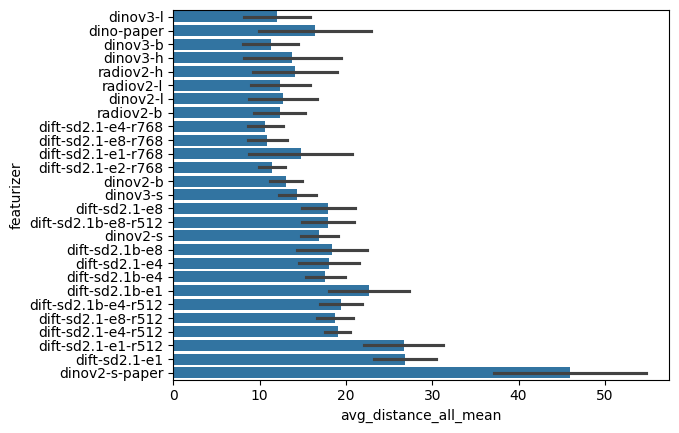

In [13]:
# barplot of the mean of the image_PCK and median distance for each featurizer



# Order the dataframe by avg_distance_all before plotting
df_sorted = grouped.sort_values('avg_distance_all_mean', ascending=True)
sns.barplot(
    y='featurizer',
    x='avg_distance_all_mean',
    data=df_sorted,
    orient='h',
    errorbar='sd'
)

/tmp/ipykernel_2201345/1684638614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')


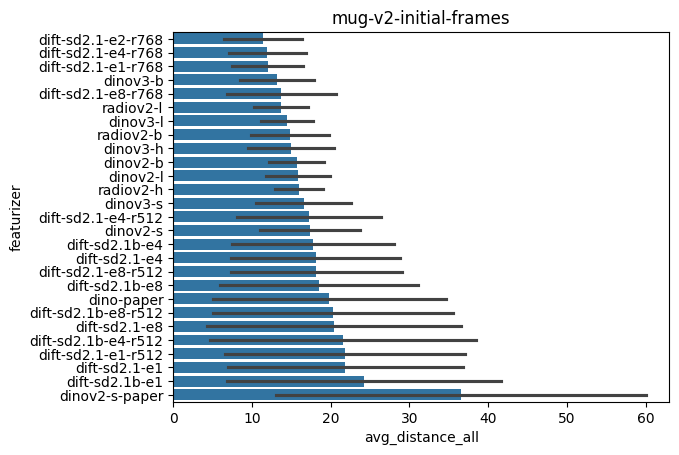

In [14]:
# generate table for each model, displaying mean of the image_PCK and median distance 

category = "mug-v2-initial-frames"
metric = "avg_distance_all"

def category_metric_barplot(category, metric):
    # plot avg_image_PCK and avg_distance_all_mean for each model

    category_df = df[df['category'] == category]
    # create mean of this metric across all seeds
    category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')
    # order by average of the metric across all seeds
    category_df = category_df.sort_values(f"{metric}_mean", ascending=True)
    sns.barplot(y="featurizer", x=f"{metric}", data=category_df,orient="h",errorbar="sd")
    plt.title(f"{category}")

category_metric_barplot(category, metric)


/tmp/ipykernel_2201345/3915852023.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')


/tmp/ipykernel_2201345/3915852023.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')
/tmp/ipykernel_2201345/3915852023.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')
/tmp/ipykernel_2201345/3915852023.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

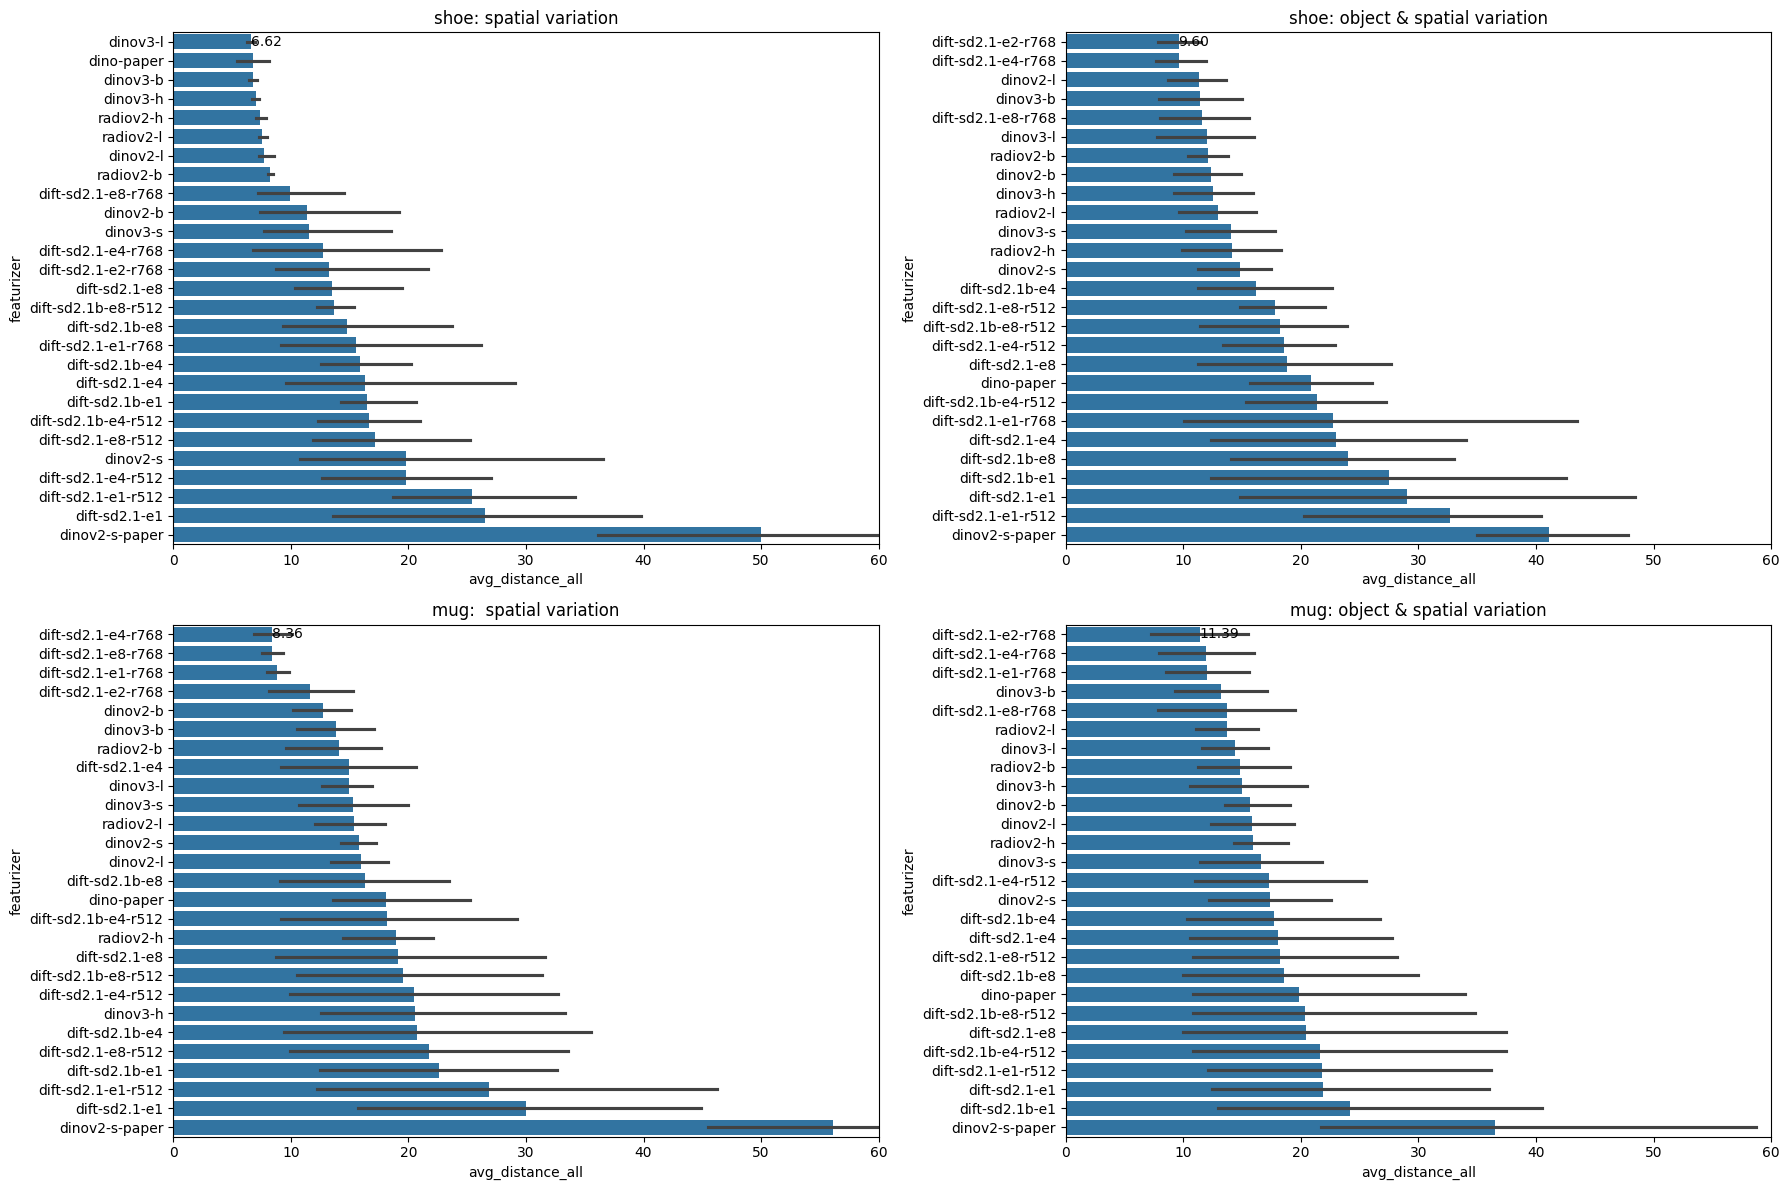

In [15]:
import matplotlib.pyplot as plt

categories = [
    "shoe-v2-initial-frames",
    "shoe-v3-initial-frames",
    "mug-v3-initial-frames",
    "mug-v2-initial-frames",

]

category_to_title_mapping = {
    "shoe-v2-initial-frames": "shoe: spatial variation",
    "shoe-v3-initial-frames": "shoe: object & spatial variation",
    "mug-v2-initial-frames": "mug: object & spatial variation",
    "mug-v3-initial-frames": "mug:  spatial variation",
}
metrics = ["avg_distance_all"] * 4  # same metric for all, but easily generalizable

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, (category, metric) in enumerate(zip(categories, metrics)):
    plt.sca(axes[idx])
    category_df = df[df['category'] == category]
    category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')
    category_df = category_df.sort_values(f"{metric}_mean", ascending=True)
    sns.barplot(y="featurizer", x=metric, data=category_df, orient="h", ax=axes[idx])
    # xrange from 0 to 60
    axes[idx].set_xlim(0, 60)
    axes[idx].set_title(f"{category_to_title_mapping[category]}")
    # add performance of best model
    best_model = category_df.iloc[0]['featurizer']
    best_model_performance = category_df.iloc[0][f"{metric}_mean"]
    axes[idx].text(best_model_performance, best_model, f"{best_model_performance:.2f}", ha='left', va='center')


plt.tight_layout()
plt.show()


/tmp/ipykernel_2201345/3295599909.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')


/tmp/ipykernel_2201345/3295599909.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')
/tmp/ipykernel_2201345/3295599909.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')
/tmp/ipykernel_2201345/3295599909.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

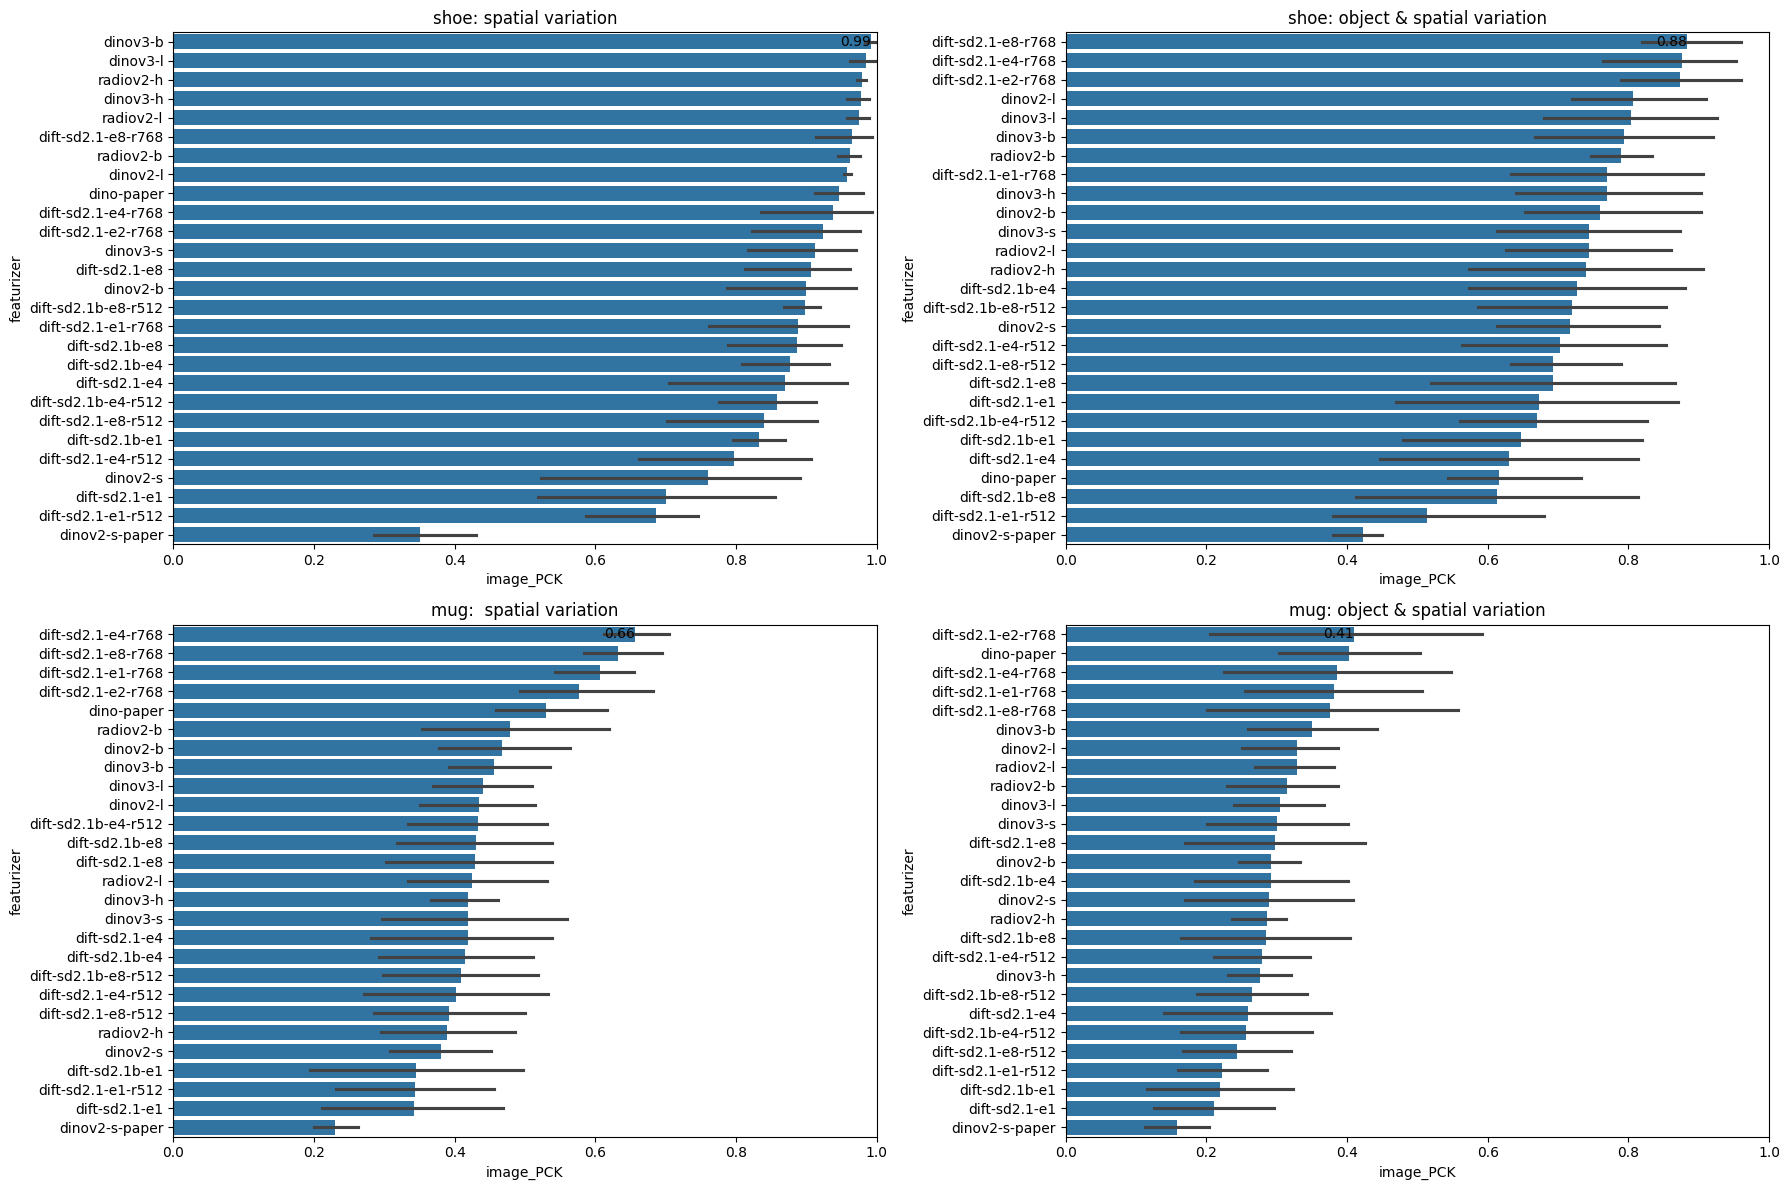

In [16]:
import matplotlib.pyplot as plt

categories = [
    "shoe-v2-initial-frames",
    "shoe-v3-initial-frames",
    "mug-v3-initial-frames",
    "mug-v2-initial-frames",

]

category_to_title_mapping = {
    "shoe-v2-initial-frames": "shoe: spatial variation",
    "shoe-v3-initial-frames": "shoe: object & spatial variation",
    "mug-v2-initial-frames": "mug: object & spatial variation",
    "mug-v3-initial-frames": "mug:  spatial variation",
}
metrics = ["image_PCK"] * 4  # same metric for all, but easily generalizable

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, (category, metric) in enumerate(zip(categories, metrics)):
    plt.sca(axes[idx])
    category_df = df[df['category'] == category]
    category_df[f"{metric}_mean"] = category_df.groupby('featurizer')[metric].transform('mean')
    category_df = category_df.sort_values(f"{metric}_mean", ascending=False)
    sns.barplot(y="featurizer", x=metric, data=category_df, orient="h", ax=axes[idx])
    axes[idx].set_title(f"{category_to_title_mapping[category]}")
    # xrange from 0 to 1
    axes[idx].set_xlim(0, 1)

        # add performance of best model
    best_model = category_df.iloc[0]['featurizer']
    best_model_performance = category_df.iloc[0][f"{metric}_mean"]
    axes[idx].text(best_model_performance, best_model, f"{best_model_performance:.2f}", ha='right', va='center')

plt.tight_layout()
plt.show()